In [1]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
home_data = pd.read_csv('honey_purity_dataset.csv')
print(home_data)

       CS;Density;WC;pH;EC;F;G;Pollen_analysis;Viscosity;Purity;Price
0       2.81;1.75;23.04;6.29;0.76;39.02;33.63;Blueberr...            
1       9.47;1.82;17.5;7.2;0.71;38.15;34.41;Alfalfa;66...            
2       4.61;1.84;23.72;7.31;0.8;27.47;34.36;Chestnut;...            
3       1.77;1.4;16.61;4.01;0.78;31.52;28.15;Blueberry...            
4       6.11;1.25;19.63;4.82;0.9;29.65;42.52;Alfalfa;5...            
...                                                   ...            
247898  1.98;1.29;17.9;4.82;0.89;36.1;34.69;Rosemary;8...            
247899  6.18;1.67;19.54;4.91;0.85;31.15;20.82;Acacia;6...            
247900  7.78;1.49;15.78;5.69;0.73;44.6;44.07;Chestnut;...            
247901  5.78;1.74;14.96;6.81;0.83;47.19;37.79;Avocado;...            
247902  8.96;1.86;18.62;6.89;0.86;25.94;42.88;Lavender...            

[247903 rows x 1 columns]


In [14]:
home_data = pd.read_csv('honey_purity_dataset.csv', usecols = ['F', 'G', 'Purity'])
home_data.head()
#F = Fruktosa
#G = Gluktosa

ValueError: Usecols do not match columns, columns expected but not found: ['Purity', 'F', 'G']

In [9]:
import seaborn as sns

sns.scatterplot(data = home_data, x = 'F', y = 'G', hue = 'Purity')


ValueError: Could not interpret value `F` for `x`. An entry with this name does not appear in `data`.

In [ ]:
h =

In [ ]:
#normalisasi data
normalized_data = preprocessing.normalize(home_data[['F','G']])
print(normalized_data)

[[0.7574861  0.65285129]
 [0.74256783 0.66977087]
 [0.62444552 0.78106837]
 ...
 [0.71132061 0.70286769]
 [0.7805621  0.62507824]
 [0.51760282 0.85562101]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='F', ylabel='G'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


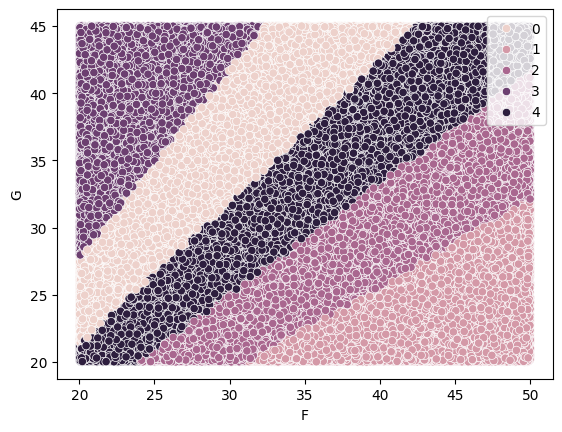

In [ ]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(normalized_data)
sns.scatterplot(data = home_data[['F', 'G']], x = 'F', y = 'G', hue = kmeans.labels_)

In [ ]:
centers = kmeans.cluster_centers_
print(centers)

[[0.63973882 0.76764128]
 [0.87497962 0.48196894]
 [0.80353013 0.59418613]
 [0.52314684 0.85080273]
 [0.72891673 0.68376856]]


In [ ]:
print(silhouette_score(normalized_data, kmeans.labels_, metric='euclidean'))